# Group 6: Machine Learning Project - Predicting F1 Podium Finishes


### Table Structure and Data Definition

1) Results - contains race results for drivers and races
    
    a) resultId - primary key of the results table 
    b) raceId - foreign key used to link to the Races table
    c) driverId - foreign key used to link to the Drivers table
    d) grid - starting position
    e) positionOrder - final position of the race (e.g. 1 is 1st place)
    f) milliseconds - milliseconds to finish the whole race
    g) fastestLap - the fastest lap # of the driver throughout the race
    h) fastestLapTime - the time of fastest lap 
    i) fastestLapSpeed - the speed of fastest lap 
    j) podium_finish (target) - driver ended the race at least in the top 3
    

2) Drivers - contains driver level information

    a) driverID - primary key of the table; identifier of the drivers
    b) nationality - driver's nationality
    c) yob - driver's year of birth
    
3) Pit Stop - race pit stop information

    a) raceId - foreign key to connect to other tables
    b) driverId - foreign key to connect to other tables
    c) # of pitstop (aggregated) - total number of pitstops per race and driver
    d) average time of pitstops (aggregated) - average time taken to complete a pitstop per race and drivers
    
4) Races - race information

    a) raceID - primary key of the table
    b) race_year - year when race was conducted
    
5) Lap Times - lap time information of the race

    a) raceId - foreign key to connect to other tables
    b) driverId - foreign key to connect to other tables
    c) top3_lap_finish (aggregated) - total number of laps that the driver finished at least top 3
    d) average_lap_time (aggregated) - average lap time in milliseconds 
    e) fastest_lap_time (aggregated) - min lap time in milliseconds 
    f) slowest_lap_time (aggregated) - max lap time in milliseconds 

### Load Libraries

In [1]:
import numpy as np
import pandas as pd 
import datetime as dt

### Load Data

In [11]:
#hey groupmates change it to your directory :D
results = pd.read_csv("C:\\Users\\Home\\Downloads\\results.csv") 
drivers = pd.read_csv("C:\\Users\\Home\\Downloads\\drivers.csv")
pitstops = pd.read_csv("C:\\Users\\Home\\Downloads\\pit_stops.csv")
races = pd.read_csv("C:\\Users\\Home\\Downloads\\races.csv")
laptimes = pd.read_csv("C:\\Users\\Home\\Downloads\\lap_times.csv")


### Pre Process Data Set

In [12]:
#filter results to finished only (status_id = 1)
results = results[results.statusId == 1]
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25386,25392,1073,846,1,4,3,7,7,7,6.0,58,+59.200,5476545,58,4,1:26.762,219.123,1
25387,25393,1073,4,214,14,11,8,8,8,4.0,58,+1:01.708,5479053,58,8,1:27.607,217.010,1
25388,25394,1073,839,214,31,9,9,9,9,2.0,58,+1:04.026,5481371,58,10,1:28.249,215.431,1
25389,25395,1073,844,6,16,7,10,10,10,1.0,58,+1:06.057,5483402,40,12,1:28.433,214.983,1


In [13]:
#create target variable
results["podium_finish"] = np.where(results['positionOrder'] <= 3, 1, 0)
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,podium_finish
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,0
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25386,25392,1073,846,1,4,3,7,7,7,6.0,58,+59.200,5476545,58,4,1:26.762,219.123,1,0
25387,25393,1073,4,214,14,11,8,8,8,4.0,58,+1:01.708,5479053,58,8,1:27.607,217.010,1,0
25388,25394,1073,839,214,31,9,9,9,9,2.0,58,+1:04.026,5481371,58,10,1:28.249,215.431,1,0
25389,25395,1073,844,6,16,7,10,10,10,1.0,58,+1:06.057,5483402,40,12,1:28.433,214.983,1,0


In [14]:
#clean drivers data
#drop unneeded columns
drivers['yob'] = pd.to_numeric(drivers['dob'].str[:4])
drivers_final = drivers.drop(['dob','driverRef','number','code','forename','surname','url'], axis=1)
drivers_final

,driverId,nationality,yob
0,1,British,1985
1,2,German,1977
2,3,German,1985
3,4,Spanish,1981
4,5,Finnish,1981
...,...,...,...
849,851,British,1995
850,852,Japanese,2000
851,853,Russian,1999
852,854,German,1999


In [15]:
#clean pitstop data
pitstop_final = pitstops.groupby(['raceId','driverId']).agg({'stop':['count'],'milliseconds':['mean']}).reset_index()
pitstop_final.columns = ['raceId', 'driverId', 'pitstop_count','pitstop_avg_time']
pitstop_final

,raceId,driverId,pitstop_count,pitstop_avg_time
0,841,1,2,23213.0
1,841,2,2,24046.0
2,841,3,1,23716.0
3,841,4,3,24055.0
4,841,5,1,24865.0
...,...,...,...,...
4286,1073,844,2,21817.0
4287,1073,846,2,21776.5
4288,1073,849,1,21241.0
4289,1073,852,2,22182.0


In [16]:
#clean races data
races = races[['raceId','year']]
races.columns = ['raceId', 'race_year']

In [17]:
#clean laptimes data
laptimes["top3_lap_finish"] = np.where(laptimes['position'] <= 3, 1, 0)
laptimes_final = laptimes.groupby(['raceId','driverId']).agg({'top3_lap_finish':['sum'],'milliseconds':['mean','min','max']}).reset_index()
laptimes_final.columns = ['raceId', 'driverId', 'top3_lap_finish','average_lap_time','fastest_lap_time','slowest_lap_time']
laptimes_final

,raceId,driverId,top3_lap_finish,average_lap_time,fastest_lap_time,slowest_lap_time
0,1,1,1,97563.758621,89020,153309
1,1,2,0,97635.672414,88283,157754
2,1,3,4,97612.172414,87706,155699
3,1,4,0,97597.637931,88712,153045
4,1,6,0,91822.235294,89923,104899
...,...,...,...,...,...,...
9712,1073,846,0,94423.189655,86762,152140
9713,1073,847,0,95032.884615,90647,166262
9714,1073,849,0,92309.820000,89293,113570
9715,1073,852,1,93500.637931,87496,138101


In [18]:
#join results table to other tables
join_drivers = results.merge(drivers_final,on = 'driverId', how = 'left')
join_pitstop = join_drivers.merge(pitstop_final,on = ['raceId','driverId'], how = 'left')
join_races = join_pitstop.merge(races, on ='raceId',how = 'left')
join_laptimes = join_races.merge(laptimes_final, on =['raceId','driverId'],how = 'left')

model_data_raw = join_laptimes
model_data_raw["driver_age"] = model_data_raw.race_year - model_data_raw.yob 


In [19]:
#drop columns that's not needed for modelling
model_data = model_data_raw.drop(['resultId','driverId','fastestLapTime','position','raceId','time','constructorId','number','positionText','positionOrder','points','laps','statusId','rank','yob','race_year'], axis=1)
model_data

,grid,milliseconds,fastestLap,fastestLapSpeed,podium_finish,nationality,pitstop_count,pitstop_avg_time,top3_lap_finish,average_lap_time,fastest_lap_time,slowest_lap_time,driver_age
0,1,5690616,39,218.300,1,British,NaN,NaN,55.0,98114.068966,87452.0,166432.0,23
1,5,5696094,41,217.586,1,German,NaN,NaN,30.0,98208.517241,87739.0,166678.0,31
2,7,5698779,41,216.719,1,German,NaN,NaN,15.0,98254.810345,88090.0,156683.0,23
3,11,5707797,58,215.464,0,Spanish,NaN,NaN,0.0,98410.293103,88603.0,170306.0,27
4,3,5708630,43,218.385,0,Finnish,NaN,NaN,46.0,98424.655172,87418.0,175160.0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6799,3,5476545,58,219.123,0,British,2.0,21776.5,0.0,94423.189655,86762.0,152140.0,22
6800,11,5479053,58,217.010,0,Spanish,1.0,21304.0,0.0,94466.431034,87607.0,152020.0,40
6801,9,5481371,58,215.431,0,French,1.0,21677.0,0.0,94506.396552,88249.0,151544.0,25
6802,7,5483402,40,214.983,0,Monegasque,2.0,21817.0,0.0,94541.413793,88338.0,151687.0,24


In [20]:
#check if there are missing values
model_data.isna().sum()

grid                   0
milliseconds           0
fastestLap             0
fastestLapSpeed        0
podium_finish          0
nationality            0
pitstop_count       4601
pitstop_avg_time    4601
top3_lap_finish     2558
average_lap_time    2558
fastest_lap_time    2558
slowest_lap_time    2558
driver_age             0
dtype: int64

In [21]:
#remove '\N' data from milliseconds and fastestlap and missing pitstop data
model_data = model_data[model_data.milliseconds != r'\N']
model_data = model_data[model_data.fastestLap != r'\N'] # need to recheck as half of the data points are gone with this
model_data = model_data[model_data.pitstop_count >= 0]

model_data.isna().sum()

grid                0
milliseconds        0
fastestLap          0
fastestLapSpeed     0
podium_finish       0
nationality         0
pitstop_count       0
pitstop_avg_time    0
top3_lap_finish     0
average_lap_time    0
fastest_lap_time    0
slowest_lap_time    0
driver_age          0
dtype: int64

In [22]:
#change date type to numeric to prepare for scaling
model_data["milliseconds"] = pd.to_numeric(model_data["milliseconds"])
model_data["fastestLap"] = pd.to_numeric(model_data["fastestLap"])
model_data["fastestLapSpeed"] = pd.to_numeric(model_data["fastestLapSpeed"])

model_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2202 entries, 4581 to 6803
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   grid              2202 non-null   int64  
 1   milliseconds      2202 non-null   int64  
 2   fastestLap        2202 non-null   int64  
 3   fastestLapSpeed   2202 non-null   float64
 4   podium_finish     2202 non-null   int32  
 5   nationality       2202 non-null   object 
 6   pitstop_count     2202 non-null   float64
 7   pitstop_avg_time  2202 non-null   float64
 8   top3_lap_finish   2202 non-null   float64
 9   average_lap_time  2202 non-null   float64
 10  fastest_lap_time  2202 non-null   float64
 11  slowest_lap_time  2202 non-null   float64
 12  driver_age        2202 non-null   int64  
dtypes: float64(7), int32(1), int64(4), object(1)
memory usage: 232.2+ KB


In [23]:
#final model data
model_data

,grid,milliseconds,fastestLap,fastestLapSpeed,podium_finish,nationality,pitstop_count,pitstop_avg_time,top3_lap_finish,average_lap_time,fastest_lap_time,slowest_lap_time,driver_age
4581,1,5370259,44,212.488,1,German,2.0,23319.500000,57.0,92590.672414,89844.0,113737.0,24
4582,2,5392556,41,211.382,1,British,2.0,23213.000000,58.0,92975.103448,90314.0,113298.0,26
4583,6,5400819,55,211.969,1,Russian,2.0,25109.000000,32.0,93117.568966,90064.0,114357.0,27
4584,5,5402031,49,213.336,0,Spanish,3.0,24055.000000,1.0,93138.465517,89487.0,113552.0,30
4585,3,5408430,50,213.066,0,Australian,3.0,24058.666667,24.0,93248.793103,89600.0,114995.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6799,3,5476545,58,219.123,0,British,2.0,21776.500000,0.0,94423.189655,86762.0,152140.0,22
6800,11,5479053,58,217.010,0,Spanish,1.0,21304.000000,0.0,94466.431034,87607.0,152020.0,40
6801,9,5481371,58,215.431,0,French,1.0,21677.000000,0.0,94506.396552,88249.0,151544.0,25
6802,7,5483402,40,214.983,0,Monegasque,2.0,21817.000000,0.0,94541.413793,88338.0,151687.0,24


In [24]:
#encode categorical features
nationality_encode=pd.get_dummies(model_data[["nationality"]])
del model_data['nationality']
model_data=pd.concat([model_data,nationality_encode],axis=1)

In [25]:
#final model data
model_data

,grid,milliseconds,fastestLap,fastestLapSpeed,podium_finish,pitstop_count,pitstop_avg_time,top3_lap_finish,average_lap_time,fastest_lap_time,...,nationality_Mexican,nationality_Monegasque,nationality_New Zealander,nationality_Polish,nationality_Russian,nationality_Spanish,nationality_Swedish,nationality_Swiss,nationality_Thai,nationality_Venezuelan
4581,1,5370259,44,212.488,1,2.0,23319.500000,57.0,92590.672414,89844.0,...,0,0,0,0,0,0,0,0,0,0
4582,2,5392556,41,211.382,1,2.0,23213.000000,58.0,92975.103448,90314.0,...,0,0,0,0,0,0,0,0,0,0
4583,6,5400819,55,211.969,1,2.0,25109.000000,32.0,93117.568966,90064.0,...,0,0,0,0,1,0,0,0,0,0
4584,5,5402031,49,213.336,0,3.0,24055.000000,1.0,93138.465517,89487.0,...,0,0,0,0,0,1,0,0,0,0
4585,3,5408430,50,213.066,0,3.0,24058.666667,24.0,93248.793103,89600.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6799,3,5476545,58,219.123,0,2.0,21776.500000,0.0,94423.189655,86762.0,...,0,0,0,0,0,0,0,0,0,0
6800,11,5479053,58,217.010,0,1.0,21304.000000,0.0,94466.431034,87607.0,...,0,0,0,0,0,1,0,0,0,0
6801,9,5481371,58,215.431,0,1.0,21677.000000,0.0,94506.396552,88249.0,...,0,0,0,0,0,0,0,0,0,0
6802,7,5483402,40,214.983,0,2.0,21817.000000,0.0,94541.413793,88338.0,...,0,1,0,0,0,0,0,0,0,0


#### Split Data to Train and Testing

In [26]:
from sklearn.model_selection import train_test_split
#split data to train_test
X = model_data.drop(['podium_finish'], axis=1)
Y = model_data['podium_finish']
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 9)

In [27]:
#scale data numerical data
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_train_minmax=min_max.fit_transform(x_train[['grid', 'milliseconds',
                'fastestLap', 'fastestLapSpeed','pitstop_count','pitstop_avg_time',
                 'top3_lap_finish','average_lap_time','fastest_lap_time','slowest_lap_time','driver_age']])
X_test_minmax=min_max.fit_transform(x_test[['grid', 'milliseconds',
                'fastestLap', 'fastestLapSpeed','pitstop_count','pitstop_avg_time',
                 'top3_lap_finish','average_lap_time','fastest_lap_time','slowest_lap_time','driver_age']])

In [28]:
y_test

5844    1
4817    0
5366    0
6693    0
5675    1
       ..
5018    1
5503    0
4771    0
4740    1
4699    0
Name: podium_finish, Length: 661, dtype: int32

In [29]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (1541, 34)
Training Labels Shape: (1541,)
Testing Features Shape: (661, 34)
Testing Labels Shape: (661,)


#### Classification of data set

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
scaler = StandardScaler()
lr = LogisticRegression()
model1 = Pipeline([('log_reg', lr)])

In [35]:
#prediction = lm.predict(X_test_minmax)
model1.fit(X_train_minmax, y_train)

Pipeline(steps=[('log_reg', LogisticRegression())])

In [36]:
y_train_hat= model1.predict(X_train_minmax)
y_train_hat_probs = model1.predict_proba(X_train_minmax)[:,1]

In [37]:
y_train_hat_probs

array([0.89441685, 0.92112654, 0.86873277, ..., 0.50937668, 0.93009831,
       0.0600766 ])

In [38]:
train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))

print('Training AUC: %.4f %%' % train_auc_roc)

print('Training accuracy: %.4f %%' % train_accuracy)

Confusion matrix:
 [[1047   44]
 [  83  367]]
Training AUC: 96.5538 %
Training accuracy: 91.7586 %


In [39]:
y_test_hat = model1.predict(X_test_minmax )
y_test_hat_probs = model1.predict_proba(X_test_minmax)[:,1]

test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy) 


Confusion matrix:
 [[436  24]
 [ 31 170]]
Testing AUC: 97.0160 %
Testing accuracy: 91.6793 %


In [40]:
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.933619  0.947826  0.940669       460
           1   0.876289  0.845771  0.860759       201

    accuracy                       0.916793       661
   macro avg   0.904954  0.896799  0.900714       661
weighted avg   0.916186  0.916793  0.916370       661



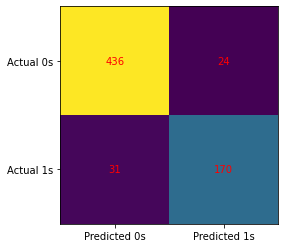

In [41]:
cm = confusion_matrix(y_test, y_test_hat)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [42]:
logModel = LogisticRegression()

In [43]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [10, 1000,2000]
    }
]

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

In [45]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [46]:
best_clf = clf.fit(X_train_minmax,y_train)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 2140 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:   34.6s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [47]:
best_clf.best_estimator_

LogisticRegression(C=3792.690190732246, max_iter=10, penalty='none',
                   solver='sag')

In [48]:
print (f'Accuracy - : {best_clf.score(X_test_minmax,y_test):.3f}')

Accuracy - : 0.920


In [49]:
grid_predictions = clf.predict(X_test_minmax)

In [50]:
print("Confusion Matrix: \n", confusion_matrix(y_test,grid_predictions))
print("\nAccuracy: ", accuracy_score(y_test, grid_predictions))
print(f'Precision: {precision_score(y_test, grid_predictions)}')
print(f'Recall: {recall_score(y_test, grid_predictions)}')
print(classification_report(y_test, grid_predictions))

Confusion Matrix: 
 [[434  26]
 [ 27 174]]

Accuracy:  0.9198184568835098
Precision: 0.87
Recall: 0.8656716417910447
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       460
           1       0.87      0.87      0.87       201

    accuracy                           0.92       661
   macro avg       0.91      0.90      0.91       661
weighted avg       0.92      0.92      0.92       661



### Feature selection

#### Using Correlation Matrix using Heatmap to visualize data correlation

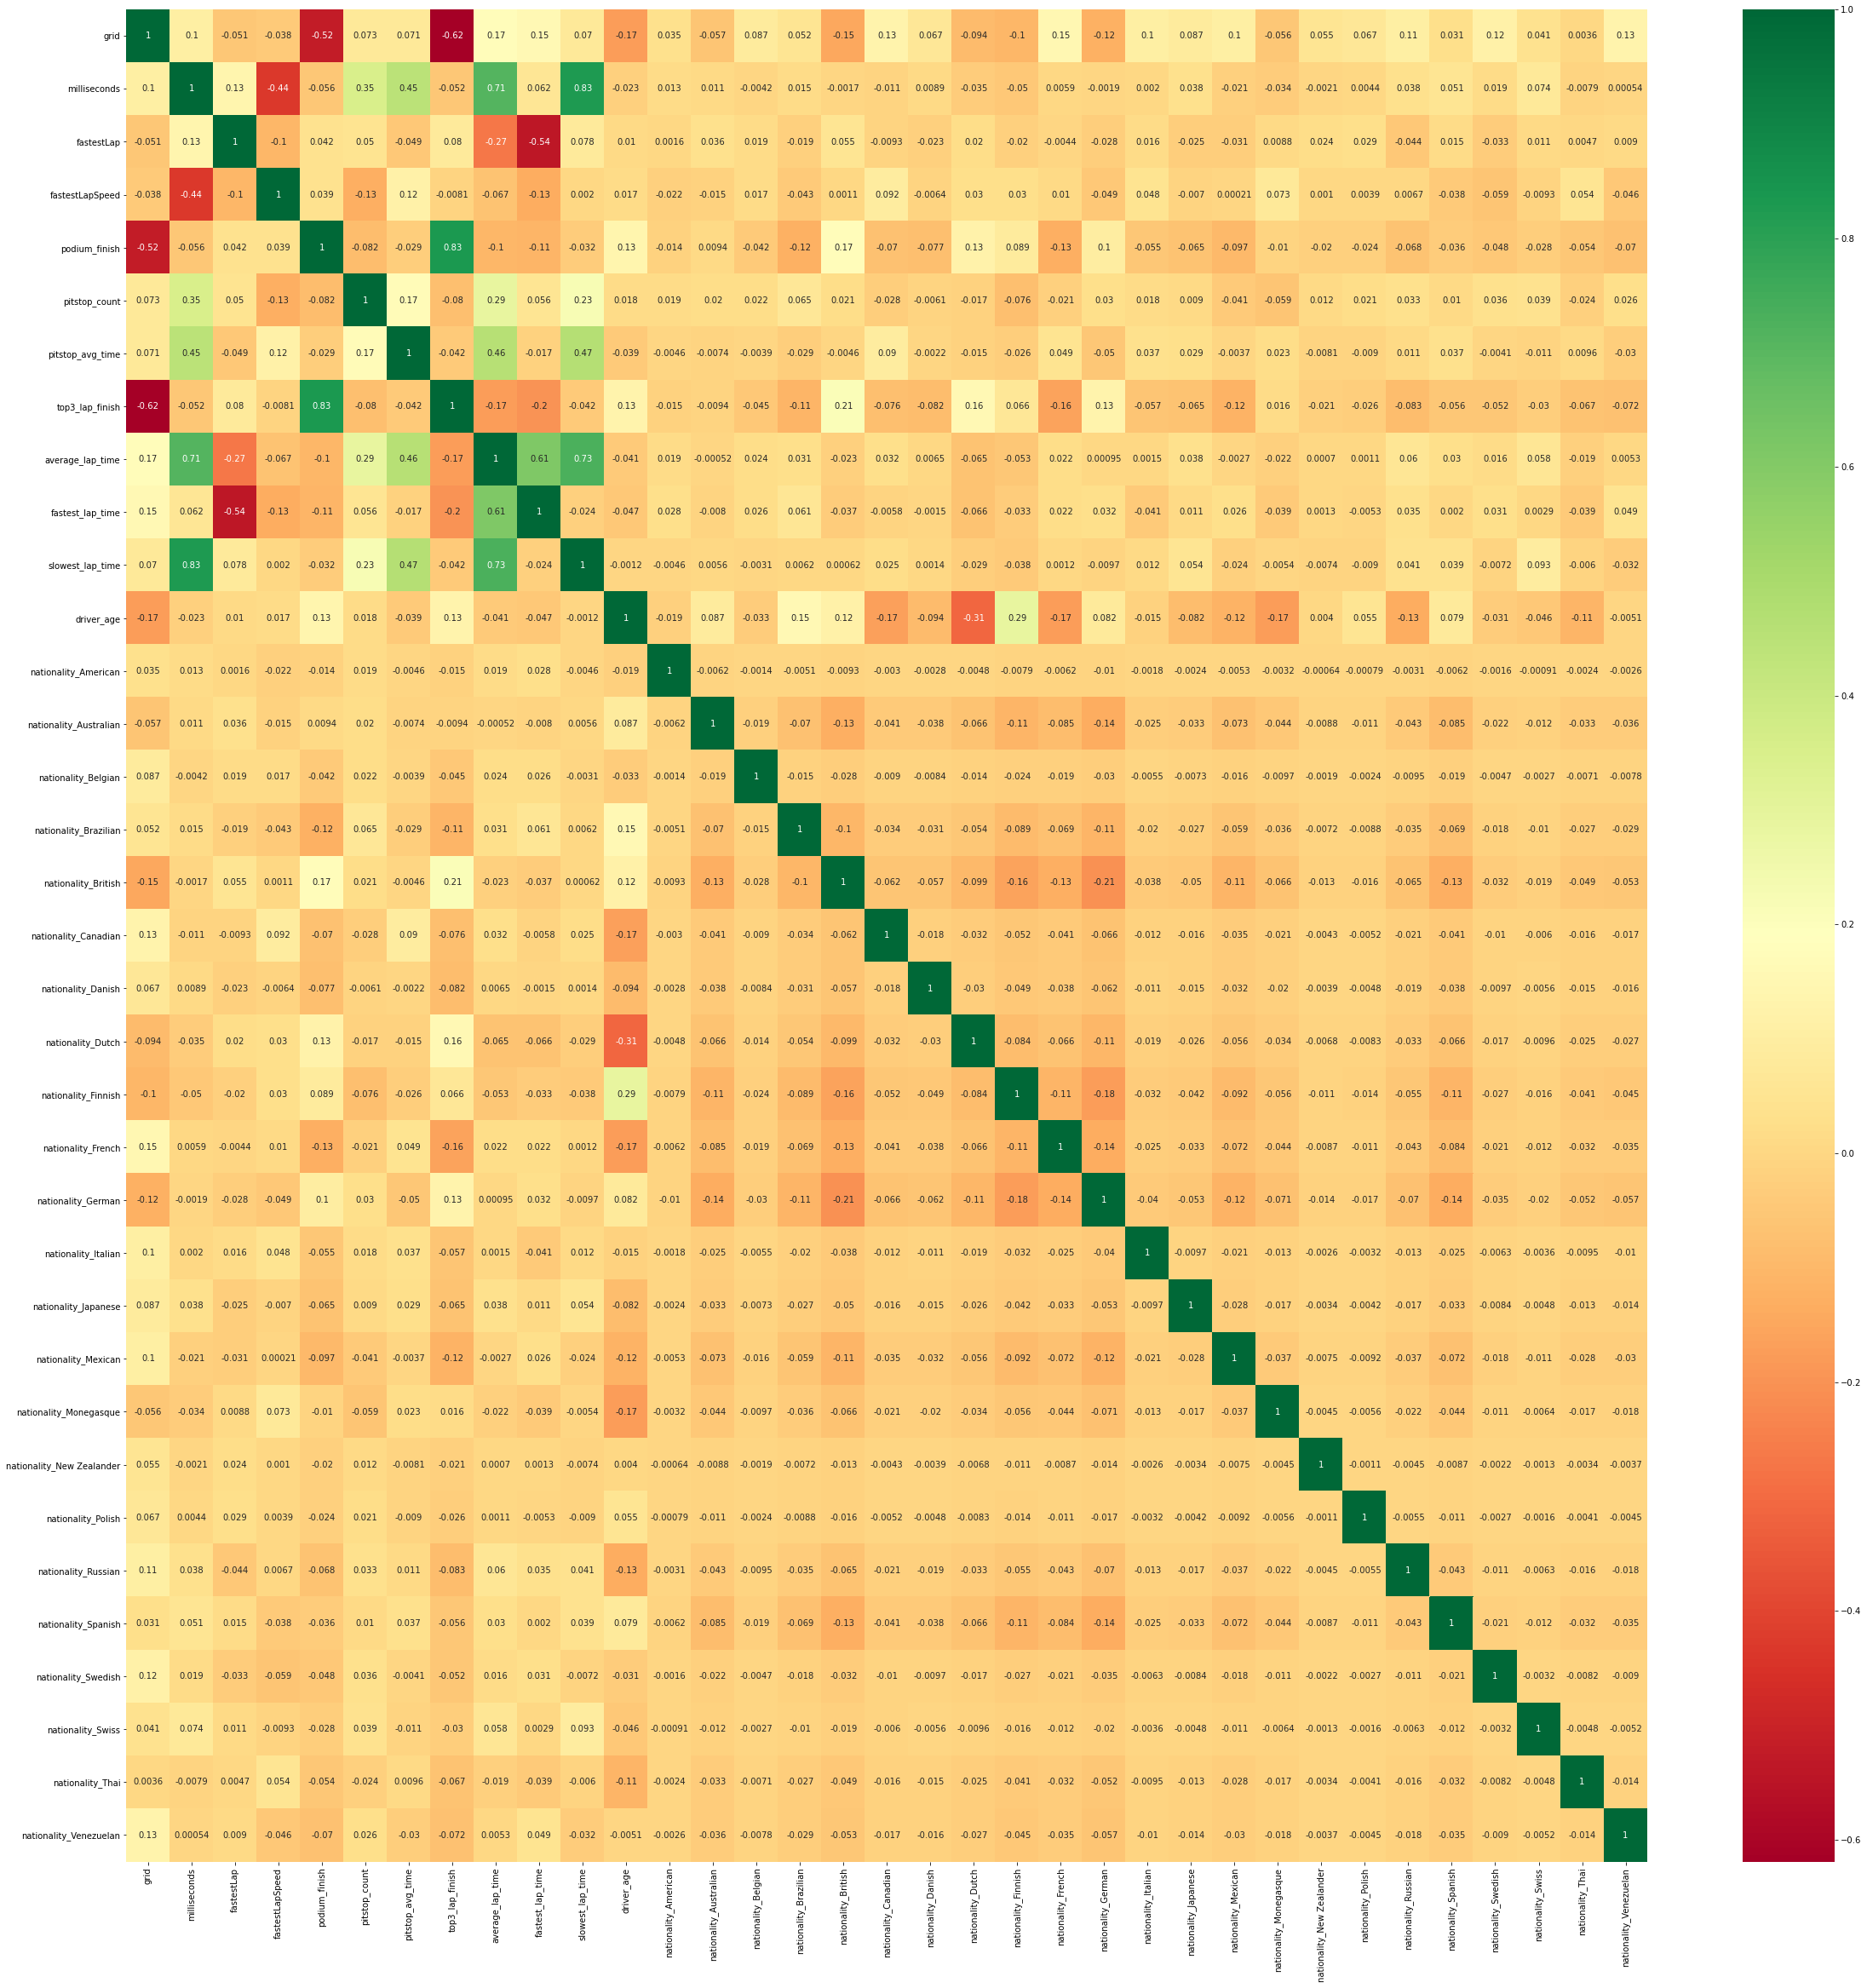

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns #Import seaborn to visualize correlation
import matplotlib.pyplot as plt

corrmat = model_data.corr()# Saving the corr values in corrmat
top_corr_features = corrmat.index #Saving column/feature names
plt.figure(figsize=(40,40))
#plot heatmap to visualize the correlation easily.
g = sns.heatmap(model_data[top_corr_features].corr(),annot=True, cmap="RdYlGn")

#### Using the inbuilt classifier called ExtraTreesClassifier to extract the best 5 features

In [53]:
from sklearn.ensemble import ExtraTreesClassifier #Import feature selector
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [54]:
print(model.feature_importances_)# after fitting, you can see the scores of the features

[1.34044606e-01 3.15000900e-02 3.29181995e-02 3.14061225e-02
 2.51383837e-02 3.18275946e-02 4.84594911e-01 3.34027033e-02
 3.46978168e-02 3.08671354e-02 4.35980474e-02 2.08530105e-06
 4.30961030e-03 8.45514333e-05 7.71424625e-03 1.89545315e-02
 2.16118369e-03 1.79883919e-03 9.96031607e-03 7.52302208e-03
 7.51660905e-03 8.27110272e-03 4.33273608e-04 1.22846468e-03
 4.23325822e-03 2.77051051e-03 2.42923979e-06 1.79070810e-05
 1.92449148e-03 3.65658860e-03 2.27741776e-04 9.39389509e-06
 1.81189595e-03 1.39233751e-03]


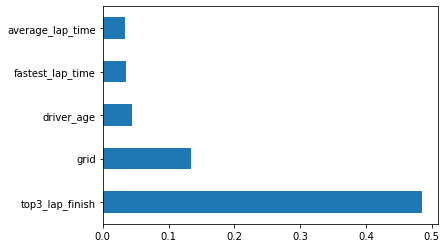

In [55]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()#plot the top 5 features in a bar graph

In [114]:
#scale data numerical data with only selected top features
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_train_minmax_2=min_max.fit_transform(x_train[['grid', 'top3_lap_finish','average_lap_time',
                                              'fastest_lap_time','driver_age']])
X_test_minmax_2=min_max.fit_transform(x_test[['grid', 'top3_lap_finish','average_lap_time',
                                              'fastest_lap_time','driver_age']])

In [115]:
lr = LogisticRegression()
model2 = Pipeline([('log_reg', lr)])
model2.fit(X_train_minmax_2, y_train)
y_train_hat_2= model2.predict(X_train_minmax_2)
y_train_hat_probs_2 = model2.predict_proba(X_train_minmax_2)[:,1]

In [116]:
y_test_hat_2 = model2.predict(X_test_minmax_2)
y_test_hat_probs_2 = model2.predict_proba(X_test_minmax_2)[:,1]

test_accuracy = accuracy_score(y_test, y_test_hat_2)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs_2)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat_2))

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy) 


Confusion matrix:
 [[435  25]
 [ 32 169]]
Testing AUC: 97.0452 %
Testing accuracy: 91.3767 %


In [117]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() # Creating an Instance of LinearRegression model
lm.fit(X_train_minmax,y_train) # Train/fit on the trainingdata, this will give-

LinearRegression()

In [118]:
print(lm.coef_)

[-4.81119794e-04  1.25746595e+00  4.75942452e-02  4.75942452e-02
  3.95600378e-02]


In [119]:
prediction = lm.predict(X_test_minmax)

In [120]:
import matplotlib.pyplot as py
%matplotlib inline

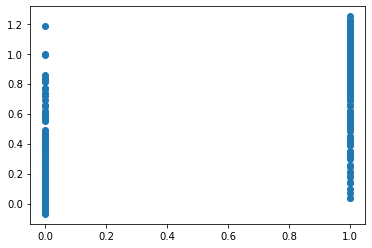

In [63]:
py.scatter(y_test,prediction)

In [64]:
from sklearn import metrics
print("MAE=", metrics.mean_absolute_error(y_test,prediction) )
print("MSE=", metrics.mean_squared_error(y_test,prediction))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE= 0.1477311450775488
MSE= 0.06179132865863428
RMSE: 0.24857861665604764


(array([  3.,   1.,   2.,   3.,   2.,   1.,   5.,   1.,   6.,   3.,   5.,
          4.,   6.,   3.,   2.,   6.,  12.,  13.,  10.,  19.,  31.,  41.,
         96., 209.,  69.,  23.,  17.,  12.,   9.,   3.,   7.,   5.,   4.,
          5.,   0.,   4.,   4.,   3.,   1.,   2.,   2.,   3.,   1.,   0.,
          0.,   2.,   0.,   0.,   0.,   1.]),
 array([-0.96248293, -0.91948344, -0.87648394, -0.83348444, -0.79048495,
        -0.74748545, -0.70448595, -0.66148646, -0.61848696, -0.57548746,
        -0.53248797, -0.48948847, -0.44648897, -0.40348948, -0.36048998,
        -0.31749048, -0.27449099, -0.23149149, -0.18849199, -0.14549249,
        -0.102493  , -0.0594935 , -0.016494  ,  0.02650549,  0.06950499,
         0.11250449,  0.15550398,  0.19850348,  0.24150298,  0.28450247,
         0.32750197,  0.37050147,  0.41350096,  0.45650046,  0.49949996,
         0.54249945,  0.58549895,  0.62849845,  0.67149794,  0.71449744,
         0.75749694,  0.80049643,  0.84349593,  0.88649543,  0.92949493,
 

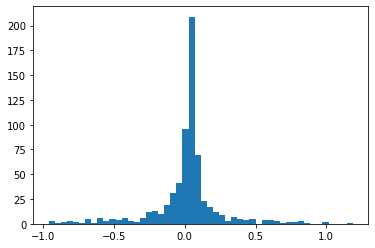

In [65]:
py.hist(prediction-y_test,bins=50)

# Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier # importing Decision tree classifier from sci-kit learn.
DT_clf = DecisionTreeClassifier()               # creating an object of decision tree model.
DT_clf.fit(X_train_minmax,y_train)              # fit the classifier with X_train_minmax and y_train(trainig process)


DecisionTreeClassifier()

In [67]:
DTC_predictions = DT_clf.predict(X_test_minmax) #  predict the output

In [68]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,DTC_predictions))
print(classification_report(y_test,DTC_predictions))
print(accuracy_score(y_test,DTC_predictions))

[[415  45]
 [ 30 171]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       460
           1       0.79      0.85      0.82       201

    accuracy                           0.89       661
   macro avg       0.86      0.88      0.87       661
weighted avg       0.89      0.89      0.89       661

0.886535552193646


In [69]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train_minmax, y_train)


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    6.9s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [70]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=2, random_state=42)

In [71]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,DTC_predictions))
print(classification_report(y_test,DTC_predictions))
print(accuracy_score(y_test,DTC_predictions))

[[415  45]
 [ 30 171]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       460
           1       0.79      0.85      0.82       201

    accuracy                           0.89       661
   macro avg       0.86      0.88      0.87       661
weighted avg       0.89      0.89      0.89       661

0.886535552193646


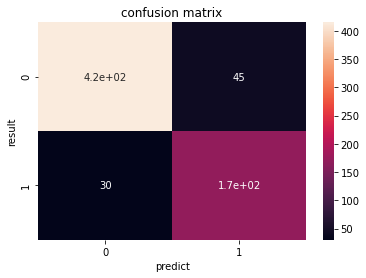

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
cf_DT = confusion_matrix(y_test,DTC_predictions)
sns = sns.heatmap(cf_DT,annot=True)
sns.set(xlabel ='predict' , ylabel ='result',title ='confusion matrix')
plt.show()

# Stochastic Gradient Decent

In [74]:
from sklearn.linear_model import SGDClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
SGD_model = SGDClassifier(loss="hinge", penalty="l2", alpha = 0.01) 
SGD_model.fit(X_train_minmax, y_train)
SGD_predictions = SGD_model.predict(X_test_minmax)

In [75]:
print(confusion_matrix(y_test,SGD_predictions))
print(classification_report(y_test,SGD_predictions))
print(accuracy_score(y_test,SGD_predictions))

[[434  26]
 [ 26 175]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       460
           1       0.87      0.87      0.87       201

    accuracy                           0.92       661
   macro avg       0.91      0.91      0.91       661
weighted avg       0.92      0.92      0.92       661

0.9213313161875946


In [76]:
from sklearn.model_selection import GridSearchCV
param_grid = {"loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],}
param_grid_sgd = GridSearchCV(SGD_model,param_grid)
param_grid_sgd.fit(X_train_minmax,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

GridSearchCV(estimator=SGDClassifier(alpha=0.01),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'loss': ['hinge', 'log', 'squared_hinge',
                                  'modified_huber'],
                         'penalty': ['l2', 'l1', 'none']})

In [78]:
print(param_grid_sgd.best_estimator_)


SGDClassifier(loss='log', penalty='l1')


In [79]:
param_grid_sgd.best_params_

{'alpha': 0.0001, 'loss': 'log', 'penalty': 'l1'}

In [80]:
grid_prediction = param_grid_sgd.predict(X_test_minmax)


In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
Accuracy_score = accuracy_score(y_test,grid_prediction)

In [82]:
print(Accuracy_score)

0.9183055975794251


In [83]:
f1_score = f1_score(y_test,grid_prediction)
print(f1_score)

0.8708133971291866


In [84]:
confusion_matrix = confusion_matrix(y_test,grid_prediction)
confusion_matrix

array([[425,  35],
       [ 19, 182]], dtype=int64)

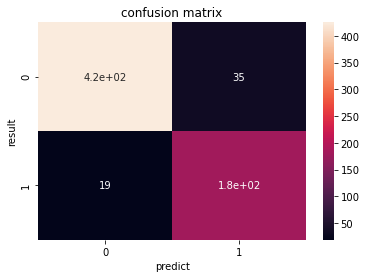

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
sns = sns.heatmap(confusion_matrix,annot=True)
sns.set(xlabel ='predict' , ylabel ='result',title ='confusion matrix')
plt.show()

### Classification of the dataset

#### Using SVM Classifier

In [86]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
model = SVC(C= 1, gamma= 0.01, kernel= 'rbf')
model.fit(X_train_minmax, y_train)
y_pred = model.predict(X_test_minmax)
from sklearn.metrics import accuracy_score
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("\nAccuracy: ", accuracy_score(y_test, y_pred))
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Confusion Matrix: 
 [[437  23]
 [ 35 166]]

Accuracy:  0.9122541603630863
Precision: 0.8783068783068783
Recall: 0.8258706467661692
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       460
           1       0.88      0.83      0.85       201

    accuracy                           0.91       661
   macro avg       0.90      0.89      0.89       661
weighted avg       0.91      0.91      0.91       661



In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5)

In [88]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 
              'kernel': ['linear', 'poly', 'rbf']} 

In [89]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3, cv=cv, n_jobs=-1)

In [90]:
grid.fit(X_train_minmax,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 368 out of 375 | elapsed:   20.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:   22.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [91]:
grid.best_params_ 

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [92]:
grid.best_estimator_ 

SVC(C=1, gamma=1, kernel='linear')

In [93]:
grid_predictions = grid.predict(X_test_minmax)

In [94]:
print("Confusion Matrix: \n", confusion_matrix(y_test,grid_predictions))
print("\nAccuracy: ", accuracy_score(y_test, grid_predictions))
print(f'Precision: {precision_score(y_test, grid_predictions)}')
print(f'Recall: {recall_score(y_test, grid_predictions)}')
print(classification_report(y_test, grid_predictions))

Confusion Matrix: 
 [[434  26]
 [ 25 176]]

Accuracy:  0.9228441754916793
Precision: 0.8712871287128713
Recall: 0.8756218905472637
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       460
           1       0.87      0.88      0.87       201

    accuracy                           0.92       661
   macro avg       0.91      0.91      0.91       661
weighted avg       0.92      0.92      0.92       661



### Removing unimportant features

### Feature selection

#### Using Correlation Matrix using Heatmap to visualize data correlation

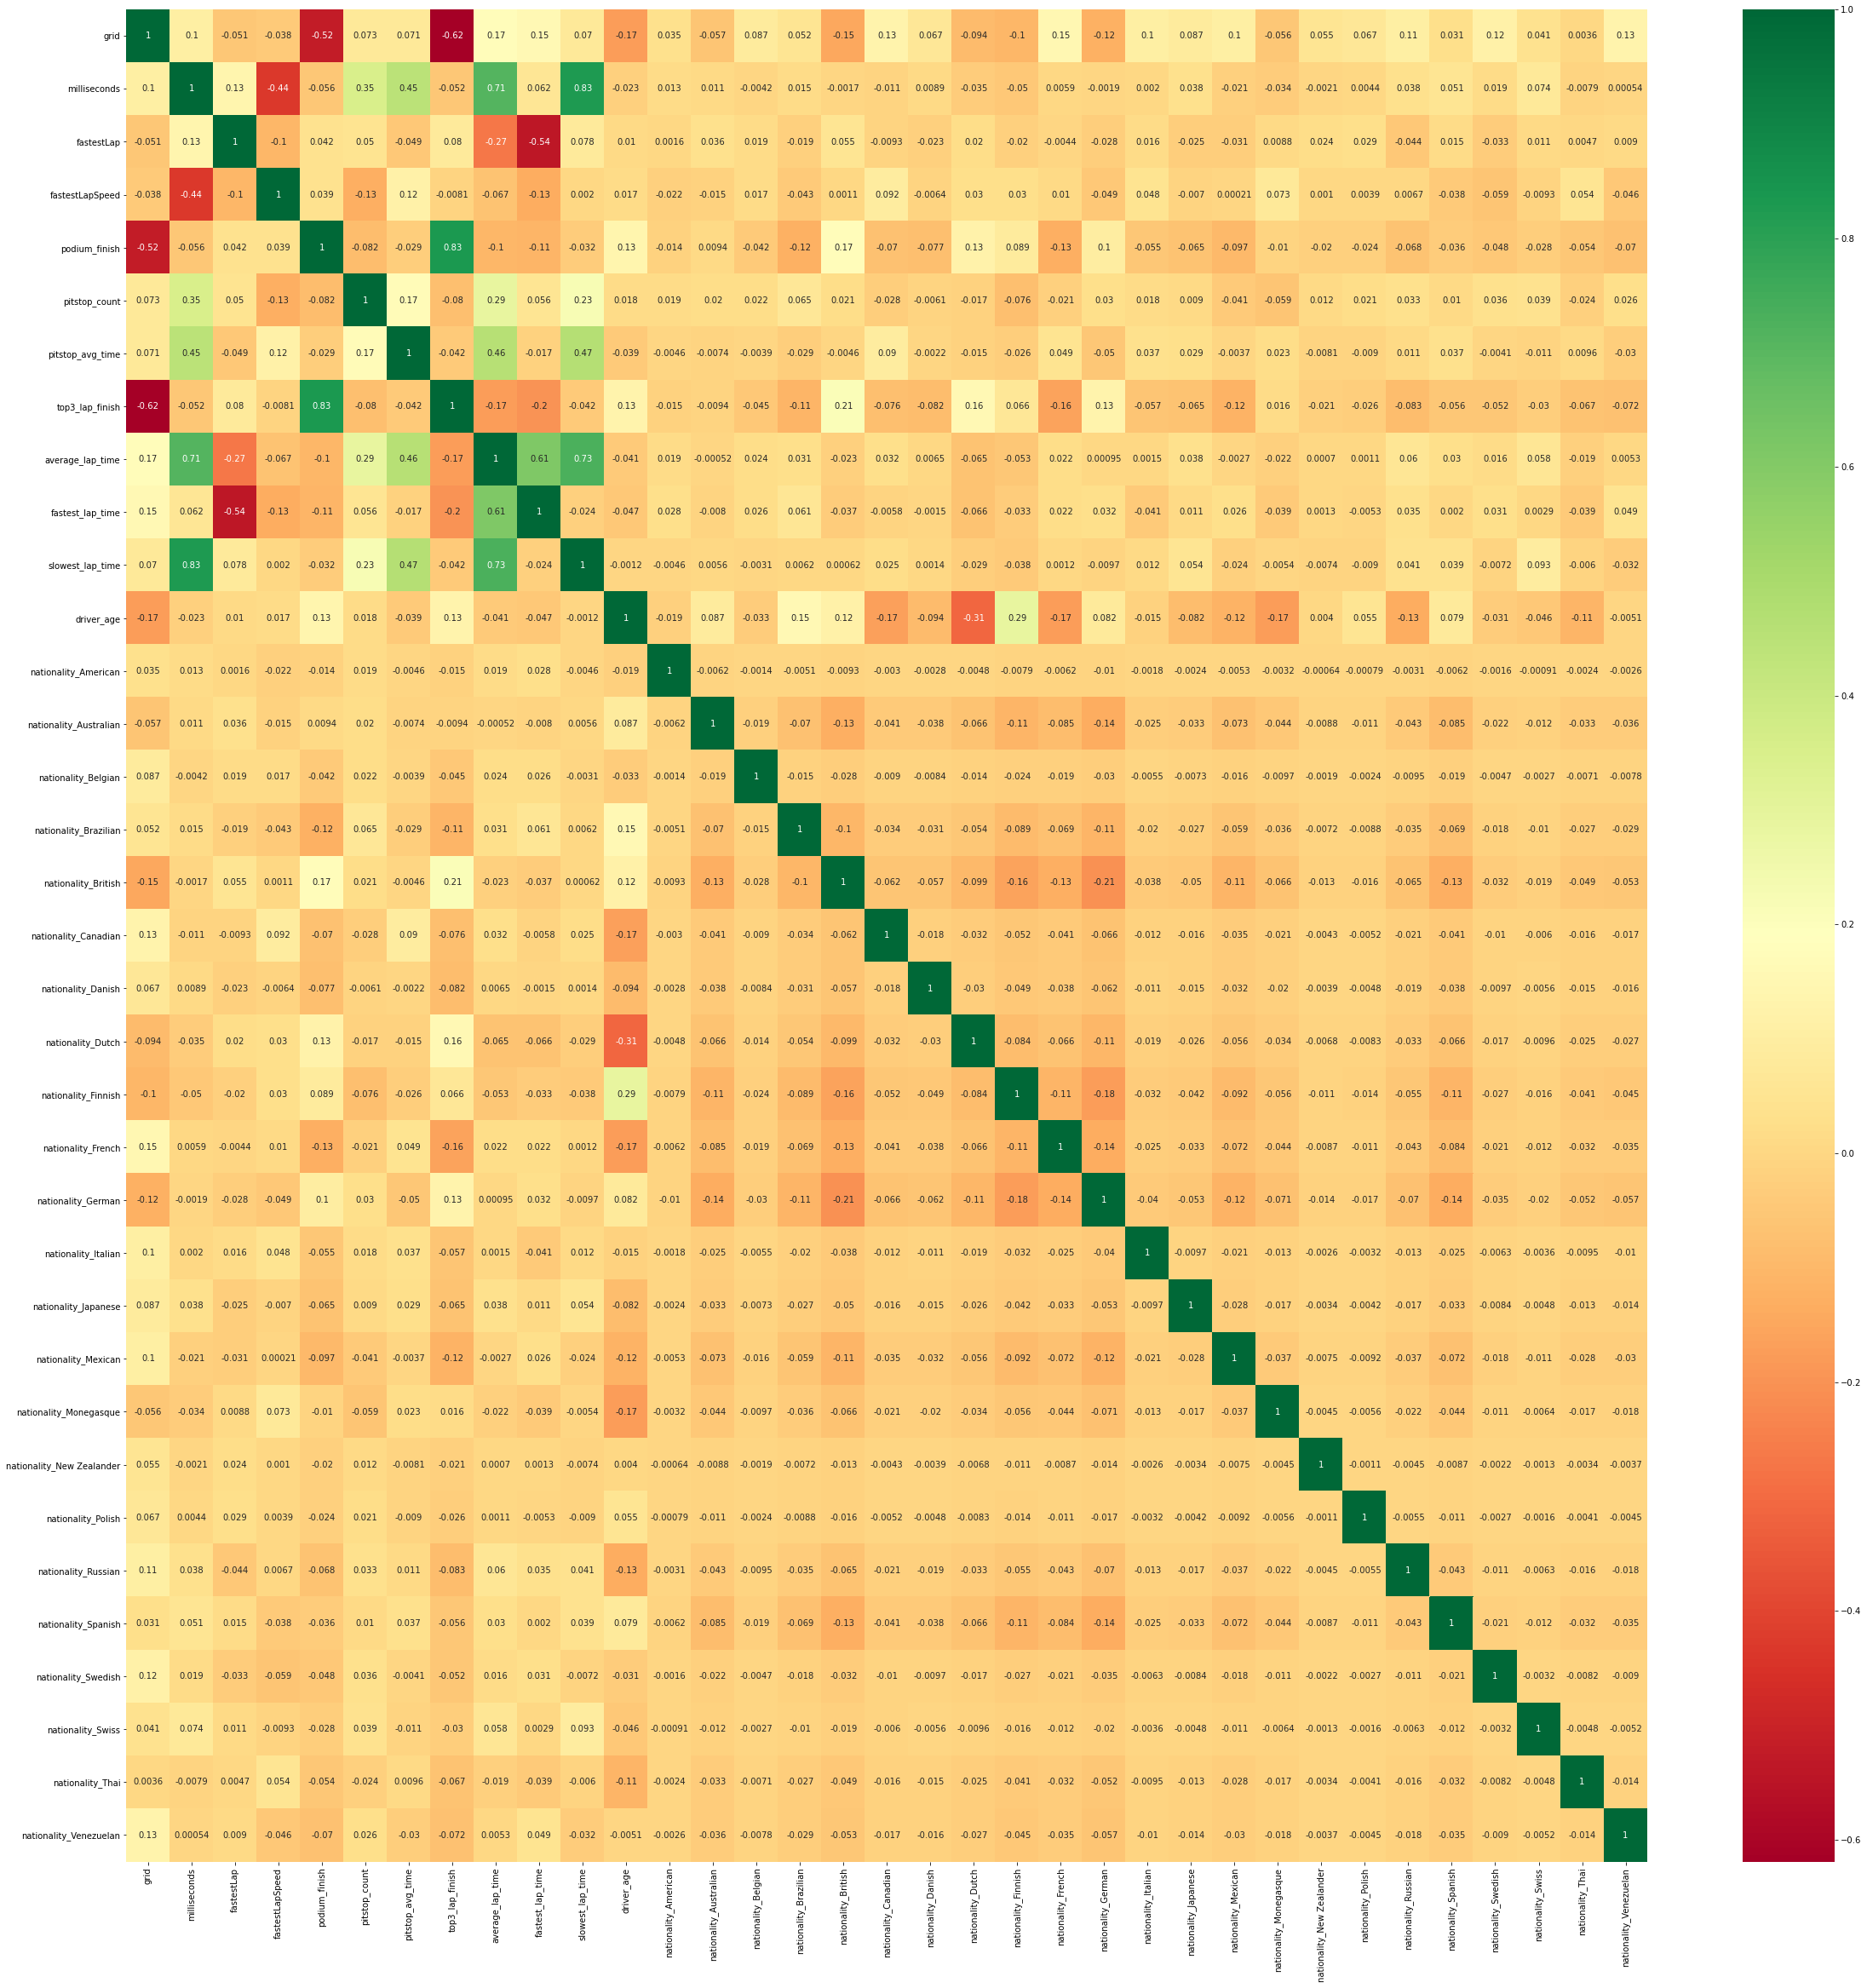

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns #Import seaborn to visualize correlation
import matplotlib.pyplot as plt

corrmat = model_data.corr()# Saving the corr values in corrmat
top_corr_features = corrmat.index #Saving column/feature names
plt.figure(figsize=(40,40))
#plot heatmap to visualize the correlation easily.
g = sns.heatmap(model_data[top_corr_features].corr(),annot=True, cmap="RdYlGn")

#### Using the inbuilt classifier called ExtraTreesClassifier to extract the best 5 features

In [101]:
from sklearn.ensemble import ExtraTreesClassifier #Import feature selector
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [102]:
print(model.feature_importances_)# after fitting, you can see the scores of the features

[1.34196168e-01 3.02038930e-02 3.26035213e-02 3.08087767e-02
 2.45491383e-02 3.09519141e-02 4.98037403e-01 3.28054890e-02
 3.36080728e-02 3.04809656e-02 4.15608522e-02 3.79249726e-06
 4.20896204e-03 1.09936032e-04 7.46506284e-03 1.52886750e-02
 1.88068334e-03 1.56588472e-03 8.65773342e-03 7.18511089e-03
 6.46027805e-03 9.09346072e-03 2.96977806e-04 8.20295585e-04
 4.46338749e-03 3.35126386e-03 5.68966783e-06 2.22138760e-05
 2.19750851e-03 3.72390433e-03 1.18862539e-04 1.83450629e-05
 1.87609264e-03 1.37968533e-03]


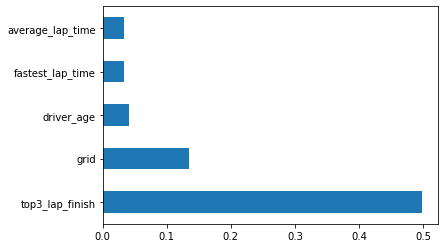

In [103]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()#plot the top 5 features in a bar graph

In [105]:
#scale data numerical data with only selected top features
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_train_minmax=min_max.fit_transform(x_train[['grid', 'top3_lap_finish','fastest_lap_time',
                                              'fastest_lap_time','driver_age']])
X_test_minmax=min_max.fit_transform(x_test[['grid', 'top3_lap_finish', 'fastest_lap_time',
                                            'fastest_lap_time','driver_age']])

In [106]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
model = SVC(C= 1, gamma= 0.01, kernel= 'rbf')
model.fit(X_train_minmax, y_train)
y_pred = model.predict(X_test_minmax)
from sklearn.metrics import accuracy_score
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("\nAccuracy: ", accuracy_score(y_test, y_pred))
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Confusion Matrix: 
 [[436  24]
 [ 35 166]]

Accuracy:  0.9107413010590015
Precision: 0.8736842105263158
Recall: 0.8258706467661692
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       460
           1       0.87      0.83      0.85       201

    accuracy                           0.91       661
   macro avg       0.90      0.89      0.89       661
weighted avg       0.91      0.91      0.91       661



#### Rerunning GridSearchCV with 5 features

In [108]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 
              'kernel': ['linear', 'poly', 'rbf']} 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5)
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3, cv=cv, n_jobs=-1)
grid.fit(X_train_minmax,y_train)
print("Best Parameters: ", grid.best_params_)
grid_predictions = grid.predict(X_test_minmax)
print("Confusion Matrix: \n", confusion_matrix(y_test,grid_predictions))
print("\nAccuracy: ", accuracy_score(y_test, grid_predictions))
print(f'Precision: {precision_score(y_test, grid_predictions)}')
print(f'Recall: {recall_score(y_test, grid_predictions)}')
print(classification_report(y_test, grid_predictions))


Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.1s


Best Parameters:  {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Confusion Matrix: 
 [[432  28]
 [ 26 175]]

Accuracy:  0.9183055975794251
Precision: 0.8620689655172413
Recall: 0.8706467661691543
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       460
           1       0.86      0.87      0.87       201

    accuracy                           0.92       661
   macro avg       0.90      0.90      0.90       661
weighted avg       0.92      0.92      0.92       661



[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:   17.1s finished


In [109]:
from sklearn.ensemble import RandomForestClassifier
 
forest = RandomForestClassifier(random_state=5)
forest.fit(X_train_minmax, y_train)

RandomForestClassifier(random_state=5)

In [110]:
# Fitting a model and making predictions
forest.fit(X_train_minmax,y_train)
y_pred = forest.predict(X_test_minmax)

In [111]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = forest.predict(X_train_minmax)
predicted_test = forest.predict(X_test_minmax)

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       460
           1       0.85      0.88      0.87       201

    accuracy                           0.92       661
   macro avg       0.90      0.91      0.90       661
weighted avg       0.92      0.92      0.92       661



In [113]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' : ['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=forest, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_test_minmax, y_test)
pred_CV_rfc = CV_rfc.predict(X_test_minmax)